In [12]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import os
import json 

In [ ]:
# Small excursion to load jsonfiles

# with open('../Config_files/Wrapping_two_0.3_strg_250_radius_0.3_KA_15_KB_10.json', 'r') as file:
#     data = json.load(file)
# data['Beads'][0]['Pos']
# data['Beads'][1]['Pos']

Now i want to check all the directories in the folder

In [7]:
current_dir = os.getcwd()
current_dir



'/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts'

In [20]:
Results_dir = current_dir+'/../Results/'
Sims_dir = Results_dir + 'Two_beads_with_switch_manual/'


Now we have the directory to start finally our processing


In [11]:
dir_list = os.listdir(Sims_dir)

print("The directories are :\n")
for i in dir_list:
    print("{}".format(i))

The directories are :

1
11
2


In [29]:
Thetas = []
E_Bead_1 = []
E_Bead_2 = []
E_Bend = []
E_Sur = []

In [30]:


for i in dir_list:
    Simulation = Sims_dir+i+"/"
    # I need to read the output data
    Output_dir = Simulation+"Output_data.txt"
    print(Output_dir)
    Sim_data = np.loadtxt(Output_dir,skiprows=1,usecols=[3,4,5,6,7,8])
    # print(Sim_data)
    json_data = json.load(open(Simulation+"Input_file.json"))
    Pos1 = json_data['Beads'][0]['Pos']
    Pos2 = json_data['Beads'][1]['Pos']
    # print(Pos1[0])
    theta = np.arctan2(Pos1[1],Pos1[0])
    theta2 = np.arctan2(Pos2[1],Pos2[0])
    print("angles are {} and {}".format(theta,theta2))
    # I have the angle Now i want the final ENergy for each state
    Thetas.append(theta)
    E_Bend.append(Sim_data[-1,0])
    E_Sur.append(Sim_data[-1,1])
    E_Bead_1.append(Sim_data[-1,3])
    E_Bead_2.append(Sim_data[-1,4])
    



/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/1/Output_data.txt
angles are 0.3 and -0.3
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/11/Output_data.txt
angles are 1.2 and -1.2
/home/mrojasve/Documents/DDG/MiraculousMembranes/projects/geometric-flow/Scripts/../Results/Two_beads_with_switch_manual/2/Output_data.txt
angles are 0.35000000000000003 and -0.35000000000000003


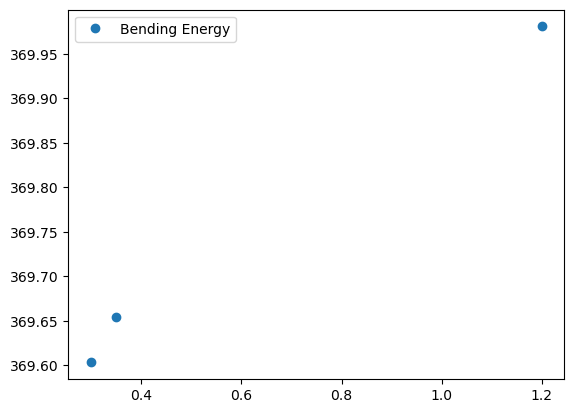

In [36]:
plt.plot(Thetas,E_Bend,'o',label='Bending Energy')
# plt.plot(Thetas,E_Sur,'o',label='Surface Energy')
# plt.plot(Thetas,E_Bead_1,'o',label='Bead 1 Energy')
# plt.plot(Thetas,E_Bead_2,'o',label='Bead 2 Energy')
plt.legend()

In [37]:
# Last step is to export the Energies to a text file
Energies = np.array([Thetas,E_Bend,E_Sur,E_Bead_1,E_Bead_2])

Processed_Energy_data_dir = Results_dir + 'Processed_data/'
if not os.path.exists(Processed_Energy_data_dir):
    os.makedirs(Processed_Energy_data_dir)
Energy_data_file = Processed_Energy_data_dir + 'Two_beads_with_switch_manual_energy_data.txt'
np.savetxt(Energy_data_file,Energies.T,header="Theta\tE_Bend\tE_Sur\tE_Bead_1\tE_Bead_2")
